# Unsupervised Image retrieval

In [ ]:
import zipfile
from google.colab import drive 
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile

file_name = "/content/gdrive/My Drive/dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


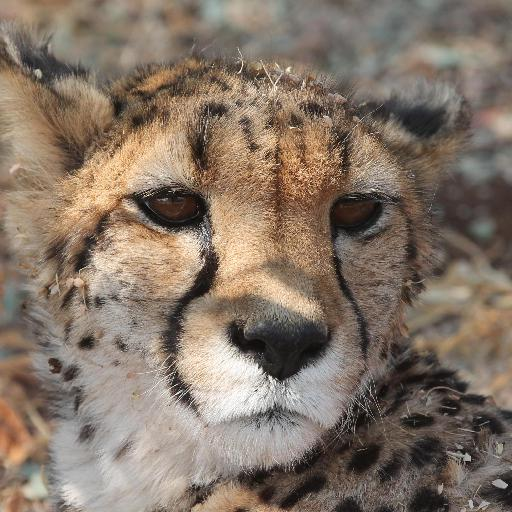

In [ ]:
import cv2

img = cv2.imread('/content/dataset/1001.jpg', -1)
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
img.shape

(512, 512, 3)

## Import the libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from glob import glob
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.preprocessing import image

In [ ]:
path = '/content/dataset'

img_dataset = []

In [ ]:
def load_img():
    img_path = os.path.join(path, "*")
    for im in glob(img_path):
        img  = cv2.imread(im)
        data = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        data = cv2.resize(data, (512, 512))
        data = image.img_to_array(data)
        img_dataset.append(data)
    print('All images loaded')

In [ ]:
load_img()

All images loaded


In [ ]:
print('Number of the Images: {}'.format(len(img_dataset)))

Number of the Images: 4738


In [ ]:
img_dataset[0].shape

(512, 512, 1)

In [ ]:
import random

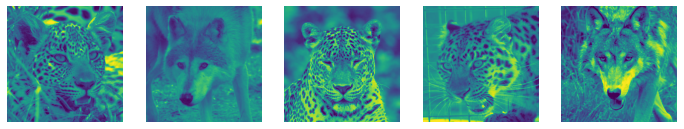

In [ ]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(img_dataset))
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

## Split the data

In [ ]:
end =round(len(img_dataset) * 0.95)

X_train =img_dataset[:end]
X_test  =img_dataset[end:]

In [ ]:
len(X_train) ,len(X_test)

(4501, 237)

## Normalize the data

In [ ]:
X_train = np.asarray(X_train) / 255
X_test = np.asarray(X_test) / 255

## Reshape the data to have 1 channel

In [ ]:
print(X_train.shape, X_test.shape)

(4501, 512, 512, 1) (237, 512, 512, 1)


In [ ]:
X_train = np.reshape(X_train, (-1, 512, 512, 1))
X_test = np.reshape(X_test, (-1, 512, 512, 1))

In [ ]:
print(X_train.shape, X_test.shape)

(4501, 512, 512, 1) (237, 512, 512, 1)


## Create the autoencoder

In [ ]:
input_img = Input(shape=(512,512,1))
x = Conv2D(32,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(16,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(4,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(2,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu',  padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 1)]     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 512, 512, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 256, 256, 16)      4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 8)        

## Train it

In [ ]:
autoencoder.fit(X_train, X_train, epochs=4, batch_size=16, callbacks=None );

Epoch 1/4
282/282 [==============================] - 26s 92ms/step - loss: 0.0277
Epoch 2/4
282/282 [==============================] - 26s 92ms/step - loss: 0.0174
Epoch 3/4
282/282 [==============================] - 26s 92ms/step - loss: 0.0165
Epoch 4/4
282/282 [==============================] - 26s 92ms/step - loss: 0.0160


In [ ]:
#autoencoder.save('autoencoder.h5')

## Create the encoder part

The encoder part is the first half of the autoencoder, i.e. the part that will encode the input into a latent space representation. In this case, the dimension of this representation is $16 \times 16 \times 2$   

In [ ]:
#autoencoder =Model('/content/autoencoder.h5')

In [ ]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)

In [ ]:
#encoder.save('encoder.h5')

In [ ]:
#encoder =Model('/content/encoder.h5')

## Load the query image

We take a query image from the test set

In [ ]:
query = X_test[8]

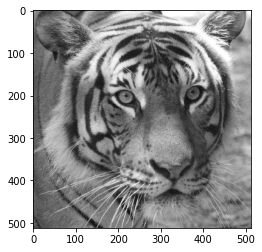

In [ ]:
plt.imshow(query.reshape(512,512), cmap='gray');

## Encode the test images and the query image

In [ ]:
X_test.shape

(235, 512, 512, 1)

We remove the query image from the test set (the set in which we will search for close images)

In [ ]:
X_test = np.delete(X_test, 8, axis=0)

In [ ]:
X_test.shape

(234, 512, 512, 1)

### Encode the query image and the test set

In [ ]:
codes = encoder.predict(X_test)

In [ ]:
query_code = encoder.predict(query.reshape(1,512,512,1))

In [ ]:
codes.shape

(234, 16, 16, 2)

In [ ]:
query_code.shape

(1, 16, 16, 2)

In [ ]:
a=1
for i in query_code[0].shape:
  a = a*i
print(a)

512


## Find the closest images

In [ ]:
from sklearn.neighbors import NearestNeighbors

We will find the 9 closest images

In [ ]:
n_neigh = 9

In [ ]:
codes = codes.reshape(-1, a); print(codes.shape)
query_code = query_code.reshape(1, a); print(query_code.shape)

(234, 512)
(1, 512)


### Fit the KNN to the test set

In [ ]:
nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes)

In [ ]:
distances, indices = nbrs.kneighbors(np.array(query_code))

In [ ]:
closest_images = X_test[indices]

In [ ]:
closest_images = closest_images.reshape(-1,512,512,1); print(closest_images.shape)

(9, 512, 512, 1)


## Get the closest images

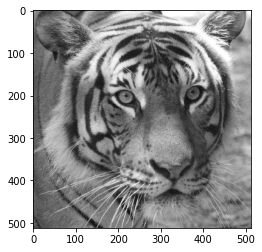

In [ ]:
plt.imshow(query.reshape(512,512), cmap='gray')

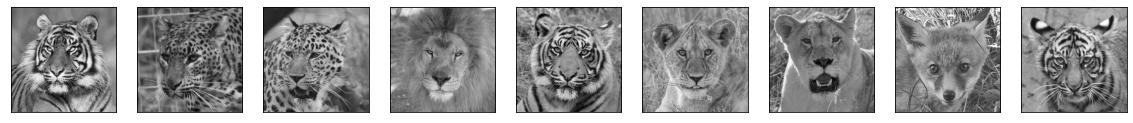

In [ ]:
plt.figure(figsize=(20, 6))
for i in range(n_neigh):
    # display original
    ax = plt.subplot(1, n_neigh, i+1)
    plt.imshow(closest_images[i].reshape(512, 512))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()